### <center><font color = #03989e>DATA3001 - Protolytix 🧬</font></center>
<center><center><center><center><center><font color = #03989e>Dharani Palanisamy (z5260276)</font></center>
<center><center><center><center><font color = #03989e>Faiyam Islam (z5258151)</font></center></center></center></center>
<center><center><center><font color = #03989e>Hilary Cao (z5308506)</font></center></center></center>
<center><center><font color = #03989e>Kelly Tao (z5259876)</font></center></center>
<center><font color = #03989e>Pooja Saianand (z5312416)</font></center>

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Importing Packages</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Proteins dataset</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [4]:
data = pd.read_csv('AF-O43526-F1-model_v3.csv')
data.head()

,index,x,y,z,gamma,exp,obs
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0


In [6]:
data['gamma_made'] = data['obs']/data['exp']
data

,index,x,y,z,gamma,exp,obs,gamma_made
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0,0.000000
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0,0.000000
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2,3.215647
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1,1.726690
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0,0.000000
...,...,...,...,...,...,...,...,...
867,868,-12.577,-52.381,-22.296,0.353039,0.586997,0,0.000000
868,869,-10.479,-51.784,-19.900,0.380064,0.597300,0,0.000000
869,870,-6.981,-50.668,-18.703,0.392629,0.529663,0,0.000000
870,871,-3.920,-51.828,-16.712,0.431890,0.630496,0,0.000000


-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Dendrogram for Hierarchical Clustering</font></center>
-------------------------------------------------------------------------------------------------------------------------------

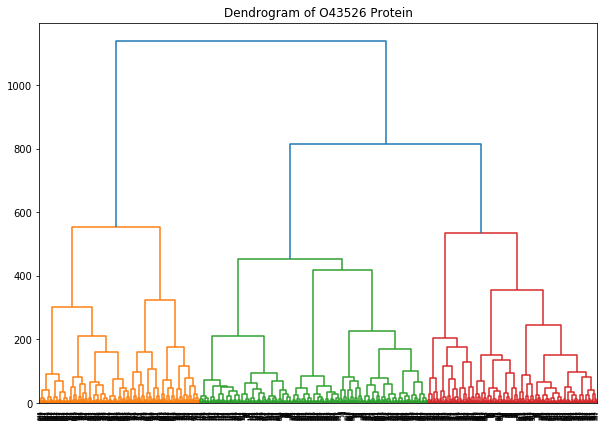

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("Dendrogram of O43526 Protein")
dend = shc.dendrogram(shc.linkage(X, method = 'ward', metric = 'euclidean'))

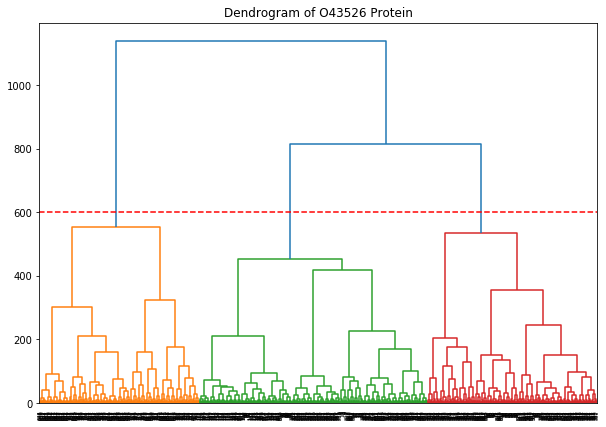

In [5]:
plt.figure(figsize = (10, 7))
plt.title("Dendrogram of O43526 Protein")
dend = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.axhline(y = 600, color = 'r', linestyle = '--')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Agglomerative Clustering Implementation</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [7]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data[['x', 'y', 'z', 'gamma_made']])

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

Text(0, 0.5, 'y')

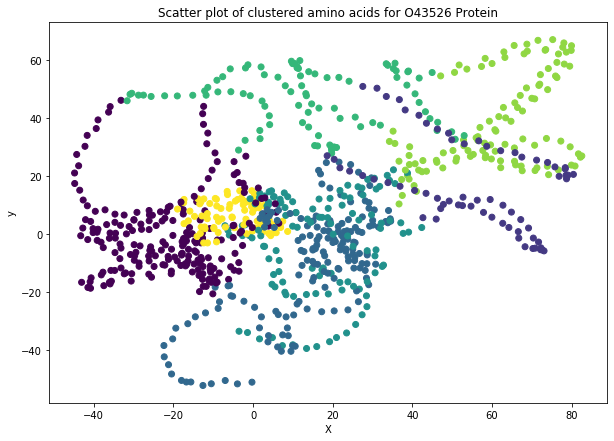

In [8]:
plt.figure(figsize = (10, 7))
plt.scatter(data['x'], data['y'], c = cluster.labels_)
plt.title("Scatter plot of clustered amino acids for O43526 Protein")
plt.xlabel('X')
plt.ylabel('y')

In [10]:
cluster.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [11]:
data.iloc[:,1:5]

,x,y,z,gamma
0,-3.512,-33.674,-14.723,0.766105
1,-1.390,-34.119,-11.579,0.286887
2,1.629,-36.312,-11.147,0.535520
3,4.865,-35.872,-9.157,0.688981
4,7.371,-38.625,-8.349,0.442748
...,...,...,...,...
867,-12.577,-52.381,-22.296,0.353039
868,-10.479,-51.784,-19.900,0.380064
869,-6.981,-50.668,-18.703,0.392629
870,-3.920,-51.828,-16.712,0.431890


In [12]:
clusters = pd.DataFrame(cluster.labels_, columns = ['cluster'])
clusters

,cluster
0,3
1,3
2,3
3,3
4,3
...,...
867,2
868,2
869,2
870,2


In [13]:
data['cluster'] = clusters
data

,index,x,y,z,gamma,exp,obs,gamma_made,cluster
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0,0.000000,3
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0,0.000000,3
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2,3.215647,3
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1,1.726690,3
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0,0.000000,3
...,...,...,...,...,...,...,...,...,...
867,868,-12.577,-52.381,-22.296,0.353039,0.586997,0,0.000000,2
868,869,-10.479,-51.784,-19.900,0.380064,0.597300,0,0.000000,2
869,870,-6.981,-50.668,-18.703,0.392629,0.529663,0,0.000000,2
870,871,-3.920,-51.828,-16.712,0.431890,0.630496,0,0.000000,2


In [14]:
data.loc[data['cluster'] == 1]

,index,x,y,z,gamma,exp,obs,gamma_made,cluster
698,699,76.851,19.767,-17.884,0.172650,0.554242,0,0.000000,1
699,700,78.571,20.107,-15.080,0.306695,0.602853,0,0.000000,1
700,701,78.715,18.891,-11.411,0.248629,0.584885,0,0.000000,1
701,702,80.442,20.421,-8.390,0.526443,0.572138,0,0.000000,1
702,703,79.093,20.166,-4.804,0.419502,0.574596,0,0.000000,1
...,...,...,...,...,...,...,...,...,...
788,789,51.573,9.894,-14.634,0.882545,0.497457,0,0.000000,1
789,790,47.795,10.066,-14.407,0.929548,0.606179,1,1.649677,1
790,791,47.121,8.633,-10.884,0.735435,0.564154,1,1.772565,1
791,792,45.987,5.003,-11.016,0.506294,0.515194,0,0.000000,1


In [15]:
data.groupby(['cluster']).mean()

,index,x,y,z,gamma,exp,obs,gamma_made
cluster,,,,,,,,
0,252.538813,-21.012986,0.166763,-21.067041,0.464778,0.567819,0.310502,0.541230
1,749.134328,55.536642,16.841284,8.532597,0.580879,0.554214,0.298507,0.525867
2,413.982353,14.008100,-9.933735,-47.671065,0.421994,0.556355,0.188235,0.345873
3,485.081301,15.934203,-2.722390,-4.396927,0.537338,0.556078,0.398374,0.705288
4,585.362637,13.055407,46.286736,-12.711747,0.686394,0.551513,0.285714,0.502616
5,601.486726,60.989062,37.805531,-39.883027,0.721505,0.566703,0.415929,0.736720
6,268.000000,-4.581921,6.171742,26.622337,0.315872,0.558421,0.134831,0.259083


In [16]:
data.groupby(['cluster']).var()

,index,x,y,z,gamma,exp,obs,gamma_made
cluster,,,,,,,,
0,40230.781744,170.341253,197.158150,426.739537,0.094870,0.002823,0.325164,0.975167
1,1020.905925,288.801854,222.528158,322.032827,0.075760,0.003788,0.424695,1.357556
2,60919.212704,188.905109,331.335668,387.033152,0.041995,0.002755,0.189210,0.664641
3,94788.026123,150.748413,267.852771,161.017465,0.073635,0.002570,0.389178,1.183513
4,19623.744811,428.503047,87.282927,338.009091,0.060848,0.002465,0.273016,0.821921
5,6934.019912,185.953207,252.718228,97.996814,0.047798,0.003570,0.352244,1.115820
6,667.500000,48.185766,23.235957,128.380469,0.041776,0.002918,0.117978,0.443205


-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Evaluation Metrics</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [17]:
X = data[['x', 'y', 'z', 'gamma_made']]
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7) 
for i in index: 
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
    
    print('At K =', i)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

At K = 2
Silhouette Coefficient: 0.319
Calinski-Harabasz Index: 396.209
Davies-Bouldin Index: 1.288
---------------------------------------------------------------
At K = 3
Silhouette Coefficient: 0.254
Calinski-Harabasz Index: 351.430
Davies-Bouldin Index: 1.206
---------------------------------------------------------------
At K = 4
Silhouette Coefficient: 0.243
Calinski-Harabasz Index: 334.041
Davies-Bouldin Index: 1.202
---------------------------------------------------------------
At K = 5
Silhouette Coefficient: 0.264
Calinski-Harabasz Index: 336.753
Davies-Bouldin Index: 1.222
---------------------------------------------------------------
At K = 6
Silhouette Coefficient: 0.282
Calinski-Harabasz Index: 345.717
Davies-Bouldin Index: 1.118
---------------------------------------------------------------


In [18]:
result = {}

for i in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X) 
    db_index = silhouette_score(X, labels) 
    result.update({i : db_index})

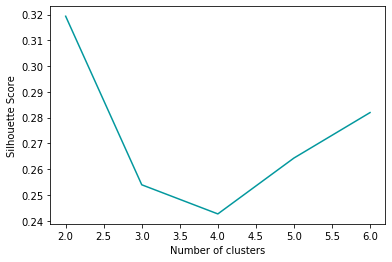

In [19]:
# Visualise 
plt.plot(list(result.keys()), list(result.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [20]:
results = {}

for i in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X)  
    db_index = calinski_harabasz_score(X, labels) 
    results.update({i : db_index})

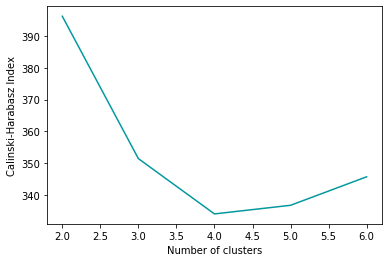

In [21]:
# Visualise 
plt.plot(list(results.keys()), list(results.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [22]:
res = {}

for i in range(2, 7):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    labels = cluster.fit_predict(X) 
    db_index = davies_bouldin_score(X, labels) 
    res.update({i : db_index})

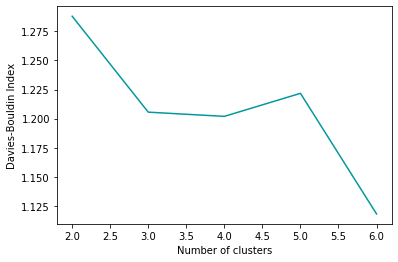

In [23]:
# Visualise 
plt.plot(list(res.keys()), list(res.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>End of Notebook</font></center>
-------------------------------------------------------------------------------------------------------------------------------